# Custom Image Object Detection Process
  - google colab으로 실행

## Custom (Image) Data 수집 + Custom (Image) Data Labeling
  - Custom Image 
    - 수화할 때 이용하는 손 알파벳 이미지
    - url = 'https://drive.google.com/uc?id=1qSkS6DaoSvVtFMlmNRssBNAb5eZRAEnI'
    - 다운로드 과정 참고 : tensorflow_object_detection_template_clone.ipynb

## project를 위한 디렉토리 구성
  - 참고 : tensorflow_object_detection_template_clone.ipynb

## 전단계
- 구글드라이브 연결 (colab 이용하는 경우)
- raw_data 폴더에 데이터 저장
- raw_data의 데이터압축파일을 VM local에 압축 풀기
  - colab 사용시 local에 파일이 있어야 빠르게 사용 가능

In [1]:
#구글 드라이브 연결
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 현재 경로 확인 
!pwd

/content


In [40]:
# 압축풀기
# !unzip -q 압축파일 -d 압축풀디렉토리(없으면 디렉토리만들고 압축 품)

!unzip -q /content/drive/MyDrive/object_detection_test/sign_language_letters/raw_data/american_sign_language_letters.zip -d /content/images

## Tensorflow Object Detection 2 API 설치


In [3]:
# tensorflow에 Object Detection API2 clone
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 64042, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 64042 (delta 130), reused 221 (delta 106), pack-reused 63794
Receiving objects: 100% (64042/64042), 574.93 MiB | 29.25 MiB/s, done.
Resolving deltas: 100% (44775/44775), done.


In [4]:
# 환경설정 - PYTHONPATH =  models/research 
import os

os.environ['PYTHONPATH'] += ":/content/models/research"
# 표준 모듈을 제외한 다른 디렉토리에 있는 모듈들 사용하고 싶은 경우
# : 구분자 

In [5]:
os.environ['PYTHONPATH']

'/env/python:/content/models/research'

In [6]:
# 추가 필요 모듈 설치
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools

Selecting previously unselected package python-bs4.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [7]:
# 4. protos 컴파일
%cd models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [8]:
# 5.  setup.py 실행

# setup.py를 현재 디렉토리로 복사
# cp 대상파일 카피경로
# . 은 현재 디렉토리
!cp object_detection/packages/tf2/setup.py .

# setup.py를 이용해 추가 패키지 설치
!pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 8.7 MB/s 
     |████████████████████████████████| 352 kB 49.0 MB/s 
     |████████████████████████████████| 1.8 MB 36.9 MB/s 
     |████████████████████████████████| 213 kB 45.7 MB/s 
     |████████████████████████████████| 4.4 MB 32.7 MB/s 
     |████████████████████████████████| 37.1 MB 47 kB/s 
     |████████████████████████████████| 636 kB 47.3 MB/s 
     |████████████████████████████████| 1.1 MB 38.7 MB/s 
     |████████████████████████████████| 99 kB 8.5 MB/s 
     |████████████████████████████████| 43 kB 2.1 

In [13]:
# 설치 잘 되었는지 확인 
# 파일이 실행이 잘 되면 설치 정상적으로 완료
!python object_detection/builders/model_builder_tf2_test.py

2021-10-04 10:25:37.460511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 10:25:37.924489: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 10:25:37.925424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-10-04 10:25:37.943058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021

## 경로 설정
- 프로젝트 진행도중 필요한 파일들을 저장하는 디렉토리 파일의 경로를 문자열로 미리 저장

In [9]:
 import os

# ROOT 경로(workspace)
BASE_PATH = "/content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/"

# utility 기능을 구현한 python script 파일들이 있는 디렉토리
SCRIPTS_PATH = "/content/drive/MyDrive/object_detection_test/sign_language_letters/scripts"

# Tensorflow Object Detection API2 경로
TF_OD_API_PATH = "/content/models"

# Image/Annotation 파일들의 경로
IMAGE_PATH = "/content/images"

# Label Map 파일을 저장할 디렉토리 경로
# Label Map 설정 파일 : 분류할 class들을 정의한 파일 
LABEL_MAP_PATH = os.path.join(BASE_PATH, "labelmap")
LABEL_MAP_FILE_PATH = os.path.join(LABEL_MAP_PATH, "label_map.pbtxt")

# TF Record를 저장할 경로
# Dataset 관련 파일들은 Google Drive 보다는 local에 저장
TF_RECORD_PATH = "/content/tfrecord"
if not os.path.isdir(TF_RECORD_PATH):
  os.mkdir(TF_RECORD_PATH)

# CUSTOM DATASET을 학습한 모델(모델, weight 파일)들을 저장할 경로
MODEL_PATH = os.path.join(BASE_PATH, "model")
CHECK_POINT_PATH = os.path.join(MODEL_PATH, "checkpoint") # weight(파라미터) 저장할 디렉토리
EXPORT_MODEL_PATH = os.path.join(MODEL_PATH, "export_model") # 학습된 모델(모델+weight)을 추출하여 저장할 디렉토리

# pipeline.config 파일 경로
# pipeline.config 파일 : 모델 구조, 학습에 필요한 정보, 평가시 필요한 정보를 설정하는 파일
PIPELINE_CONFIG_PATH = os.path.join(MODEL_PATH, "pipeline.config")

# 전이 학습에 사용할, 다운받은 모델을 저장할 디렉토리
PRE_TRAINED_MODEL_PATH = os.path.join(BASE_PATH, "pre_trained_model")


## Custom data 학습을 위한 설정파일 설정 및 데이터셋 준비
###다음 세가지 작업이 필요
<span style='font-weight:bold;font-size:1.3em'>1. Label Map 파일 생성</span>
- 분류 하고자 하는 object의 class와 그 class id 를 pbtxt text 파일로 작성
- json 파일이 아닌 protocol buffer
  - protocol buffer
    - binary 형식
    - text gudtlr
- `models\research\object_detection\data`

```
item {
  id: 1
  name: 'aeroplane'
}

item {
  id: 2
  name: 'bicycle'
}
...
```
- item : 하나의 class
- id : 고유한 숫자
- name : label
- **쉼표 없는 것 주의** 
- 확장자는 pbtxt 이지만 text 파일

<span style='font-weight:bold;font-size:1.3em'>2. pipeline.config</span>
- Model을 학습, 검증하기 위해 필요한 설정을 하는 파일
- `models\research\object_detection\samples\configs`

<span style='font-weight:bold;font-size:1.3em'>3. 학습/검증/테스트에 사용할 데이터셋을 TFRecord 로 구성</span>
- 주요 데이터셋을 TFRecord로 생성하는 코드
- `models\research\object_detection\dataset_tools`

<span style='font-weight:bold;font-size:1.3em'>1. Label Map 파일 생성</span>
- 분류 하고자 하는 object의 class와 그 class id 를 pbtxt text 파일로 작성
- json 파일이 아닌 protocol buffer
  - protocol buffer
    - binary 형식
    - text gudtlr
- `models\research\object_detection\data`

```
item {
  id: 1
  name: 'aeroplane'
}

item {
  id: 2
  name: 'bicycle'
}
...
```
- item : 하나의 class
- id : 고유한 숫자
- name : label
- **쉼표 없는 것 주의** 
- 확장자는 pbtxt 이지만 text 파일

In [25]:
# class : A ~ Z(26개)
names = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
ids = range(1, 27)

In [17]:
# File I/O를 이용하여 LABEL 파일 생성

with open(LABEL_MAP_FILE_PATH, "wt") as fw:
  for id, name in zip(ids, names):
    fw.write("item { \n")
    fw.write(f"\tid:{id}\n")
    fw.write(f"\tname:'{name}'\n") # 문자열이기 때문에
    fw.write("}\n")

### TFRecord 생성
- `scripts/generate_tfrecord.py`을 사용해서 생성
- command line argument
  - `x, --xml_dir` : annotation xml 파일들이 있는 디렉토리 경로
  - `-l, --labels_path` : label map 파일 경로(파일명 포함)
  - `-o, --output_path` : 생성된 tfrecord 파일의 경로(파일명 포함)
  - `-i, --image_dir` : 이미지 파일들이 있는 디렉토리 경로
    - (annotation 파일과 동일한 경로에 있으면 생략 가능)


In [10]:
# 파일을 어디에 저장할 것인지
# annotation 파일은 어디에 있는지
# image 파일은 어디에 있는지 알려주어야 함
# command line argument(command line을 통해 값 전달)

# /content/drive/MyDrive/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py
# 위의 파일 확인하여 실행 

#### train data

In [26]:
f"!python {SCRIPTS_PATH}/generate_tfrecord.py -x {IMAGE_PATH}/train -l {LABEL_MAP_FILE_PATH} -o {TF_RECORD_PATH}/train.tfr"

'!python /content/drive/MyDrive/object_detection_test/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/train -l /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/train.tfr'

In [42]:
!python /content/drive/MyDrive/object_detection_test/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/train -l /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/train.tfr

Successfully created the TFRecord file: /content/tfrecord/train.tfr


#### valid data

In [29]:
f"!python {SCRIPTS_PATH}/generate_tfrecord.py -x {IMAGE_PATH}/valid -l {LABEL_MAP_FILE_PATH} -o {TF_RECORD_PATH}/valid.tfr"

'!python /content/drive/MyDrive/object_detection_test/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/valid -l /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/valid.tfr'

In [43]:
!python /content/drive/MyDrive/object_detection_test/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/valid -l /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/valid.tfr

Successfully created the TFRecord file: /content/tfrecord/valid.tfr


#### test data

In [33]:
f"!python {SCRIPTS_PATH}/generate_tfrecord.py -x {IMAGE_PATH}/test -l {LABEL_MAP_FILE_PATH} -o {TF_RECORD_PATH}/test.tfr"

'!python /content/drive/MyDrive/object_detection_test/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/test -l /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/test.tfr'

In [44]:
!python /content/drive/MyDrive/object_detection_test/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/test -l /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/test.tfr

Successfully created the TFRecord file: /content/tfrecord/test.tfr


In [36]:
# 생성된 tfrecord 파일을 google drive에 copy(백업)
f"!cp {TF_RECORD_PATH}/*.tfr {os.path.join(BASE_PATH, 'tfrecord')}"

'!cp /content/tfrecord/*.tfr /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/tfrecord'

In [37]:
!cp /content/tfrecord/*.tfr /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/tfrecord

### Pretrained Model Download
- Tensorflow object detection API는 MS COCO 2017 dataset으로 미리 학습시킨 다양한 Object Detection 모델을 제공
- tf2 detection Model Zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
- SSD MobileNet V2 FPNLite 320x320 다운로드
    - 성능은 떨어지지만 학습속도가 빠름

In [22]:
# wget urt : url의 파일을 다운로드 하는 리눅스 명령어
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2021-10-04 13:39:49--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.148.128, 2607:f8b0:4001:c54::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.148.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz.1’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.08s   

2021-10-04 13:39:49 (241 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz.1’ saved [20515344/20515344]



In [46]:
# 다운 받은 모델을 google drive 로 옮기고 압축 풀기
f"!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz {PRE_TRAINED_MODEL_PATH}"

'!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/pre_trained_model'

In [23]:
!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/pre_trained_model

In [48]:
# 압축 풀기 # tar.gz : tar -zxvf  압축파일 경로 -C 압축풀경로
f"!tar -zxvf {PRE_TRAINED_MODEL_PATH}/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C {PRE_TRAINED_MODEL_PATH}"

'!tar -zxvf /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/pre_trained_model'

In [24]:
!tar -zxvf /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz -C /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/pre_trained_model

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [50]:
#pretrained된 모델이 생성

### Pipeline.config 설정 변경

#### pipeline.config  파일 개요
- Model을 학습, 검증하기 위해 필요한 설정을 하는 파일

- 구조
    - https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/configuring_jobs.md
    - **model**
        - 사용하는 모델에 대한 설정
        - class 개수
        - 입력이미지 size
        - anchor 설정
    - **train_config**
        - Train(학습)관련 설정
        - batch_size
            - 사용하는 GPU의 메모리 크기에 맞게 조절한다.
        - image augmentation관련 설정 등
        - optimizer관련 설정
        - 학습에 사용할 weight 파일의 경로
    - **train_input_reader**
        - labelmap 파일 경로
        - train tfrecord 파일 경로
    - **eval_config**
        - evaluation(평가)을 위해 사용하는 metric 설정
    - **eval_input_reader**
        - labelmap 파일 경로
        - evaluation tfreord 파일 경로


- config 파일을 열어 바꾸는 방법과 코드상에서 바꾸는 방법이 존재
        

## Pretrain model의 pipeline.config 파일 카피
- pretrained 모델의 압축을 풀면 pipeline.config 파일 존재
- workspace\model 로 copy

In [25]:
PRE_TRAINED_MODEL_PATH = os.path.join(PRE_TRAINED_MODEL_PATH, "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8")
PRE_TRAINED_MODEL_PATH

'/content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'

In [26]:
f"!cp {os.path.join(PRE_TRAINED_MODEL_PATH, 'pipeline.config')} {PIPELINE_CONFIG_PATH}"

'!cp /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/pipeline.config'

In [27]:
!cp /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/pipeline.config

### pipeline.config 설정 변경
- pipeline.config 내용 변경은 파일을 **직접 변경**할 수도 있고 **코드상에서 변경**도 가능

#### 필수 변경사항
-  class개수 변경
-  train 배치 사이즈 변경
  - 크게 잡을 수록 좋으나 gpu 메모리 사양에 맞게 변경
-  pretrained model 경로 설정
  - fine_tune_checkpoint
-  pretrained model이 어떤 종류의 모델인지 설정
  - fine_tune_checkpoint_type
-  train 관련 변경
    -  labelmap 파일 경로 설정
    -  train 용 tfrecord 파일 경로 지정
-  evaluation 관련 변경
    -  labelmap 파일 경로 설정
    -  evaluation 용 tfrecord 파일 경로 지정

In [14]:
# Tensorflow Object Detection API에서 제공하는 Library를 이용해 pipeline.config 변환 작업

import tensorflow as tf
from object_detection.utils import config_util 
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [28]:
#  pipeline.config 파일을 읽어서 확인

config = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_PATH)
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [29]:
# 수정 작업
# 빈 pipeline.config 템플릿을 생성
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig() # pipeline.config의 속성들을 수정하는 기능을 제공
print(type(pipeline_config))
print(pipeline_config)

<class 'object_detection.protos.pipeline_pb2.TrainEvalPipelineConfig'>



In [30]:
# pipeline.config의 내용을 text로 읽어서 TrainEvalPipelineConfig(템플릿 - 틀)에 넣음
with tf.io.gfile.GFile(PIPELINE_CONFIG_PATH, 'r') as fr: # open()의 Tensorflow 버전
  proto_str = fr.read() # text로 읽기
  text_format.Merge(proto_str, pipeline_config) # 읽은 설정 text를 속성 단위로 나눠서 TrainEvalPipelineConfig에 넣어줌

In [31]:
# 각 항목(속성)들을 변경(수정)

# 검출할 class의 개수 (A ~ Z : 26)
pipeline_config.model.ssd.num_classes = 26 

# batch_Size
pipeline_config.train_config.batch_size = 8

#pretrained model의 weight(전이 학습에서 초기 weight - 파일명(확장자뺀)까지 지정.) 
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(PRE_TRAINED_MODEL_PATH, 'checkpoint', 'ckpt-0')

#pretrained 모델이 어떤 작업을 위한 학습을 할 모델인지 지정.
pipeline_config.train_config.fine_tune_checkpoint_type =  "detection" # object detection : detection(model zoo- ouputs: Boxes)



#Train dataset 관련 설정
# label map 경로
pipeline_config.train_input_reader.label_map_path = LABEL_MAP_FILE_PATH

# train tfrecord 경로
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(TF_RECORD_PATH, 'train.tfr')]


# Evaluation dataset 관련 설정
# label map 파일 경로
pipeline_config.eval_input_reader[0].label_map_path  = LABEL_MAP_FILE_PATH # RepeatedCompositionContainer : list 구현체

# validation tfrecord 경로
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(TF_RECORD_PATH, 'valid.tfr')]

In [32]:
# 변경된 내용을 pipeline.config 파일에 덮어쓰기
# TrainEvalPipelineConfig를 text(string)으로 변환
config_text = text_format.MessageToString(pipeline_config)
# 파일로 저장(출력)
with open(PIPELINE_CONFIG_PATH, 'w') as fw:
  fw.write(config_text)

# Model 학습
- 다음 명령어를 실행
- 시간이 오래 걸리므로 terminal에서 실행

```
python models/research/object_detection/model_main_tf2.py --model_dir=workspace/model/checkpoint --pipeline_config_path=workspace/model/pipeline.config --num_train_steps=3000
```

  - model_main_tf2.py 이 학습해주는 파일
  
## 옵션
- model_dir: 학습한 모델의 checkpoint 파일을 저장할 경로. (1000 step당 저장)
- pipeline_config_path: pipeline.config 파일 경로
- num_train_steps: 학습할 step 수

In [65]:
f"!python /content/models/research/object_detection/model_main_tf2.py --model_dir {CHECK_POINT_PATH} --pipeline_config_path {PIPELINE_CONFIG_PATH} --num_train_steps=3000"
# ctrl+space : 자동완성

'!python /content/models/research/object_detection/model_main_tf2.py --model_dir /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/checkpoint --pipeline_config_path /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/pipeline.config --num_train_steps=3000'

In [45]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/checkpoint --pipeline_config_path /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/pipeline.config --num_train_steps=3000

2021-10-04 14:11:45.691059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 14:11:45.700502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 14:11:45.701341: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 14:11:45.702941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 14:11:45.703760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [ ]:
# 3000번 학습은 너무 적기 때문에 5만번 학습한 것을 model/checkpoint_backbone에 저장

# 학습한 모델 추출(export)
- `models/research/object_detection/exporter_main_v2.py` 사용
- 옵션
    - `exporter_main_v2.py --helpshort || exporter_main_v2.py --helpfull`
    - input_type : input node type
        - image_tensor, encoded_image_string_tensor
    - train_checkpoint: 학습된 checkpoint 파일이 저장된 경로(folder/directory)
    - pipeline_config_path: pipeline.config 파일의 경로 (파일명 포함)
    - output_directory: export된 모델을 저장할 경로.
- 추출된 디렉토리 구조
```bash
output_dir
├─ checkpoint/
├─ saved_model/
└─ pipeline.config
```
    - checkpoint: custom data 학습한 checkpoint 파일들을 이 디렉토리로 복사
    - save_model: pipeline.config 설정에 맞춰 생성된 model
    - pipeline.config: pipeline.config 설정파일

In [47]:
f"!python /content/models/research/object_detection/exporter_main_v2.py --input_type image_tensor \
--trained_checkpoint_dir {CHECK_POINT_PATH} \
--pipeline_config_path {PIPELINE_CONFIG_PATH} \
--output_directory {EXPORT_MODEL_PATH}"

'!python /content/models/research/object_detection/exporter_main_v2.py --input_type image_tensor --trained_checkpoint_dir /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/checkpoint --pipeline_config_path /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/pipeline.config --output_directory /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/export_model'

In [48]:
!python /content/models/research/object_detection/exporter_main_v2.py --input_type image_tensor --trained_checkpoint_dir /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/checkpoint --pipeline_config_path /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/pipeline.config --output_directory /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/export_model

2021-10-04 14:33:55.238194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 14:33:55.249803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 14:33:55.250664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 14:33:55.264044: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 14:33:55.264883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Inference(추론)

### 사용 함수,메소드
-  ### tf.convert_to_tensor(array_like, dtype)
    - array_like 를 Tensoflow Tensor 객체로 변환
    - `tf.convert_to_tensor([[1,2],[3,4]])`
- ### detection_model.preprocess(image 4차원 ndarray)
    - 전달받은 이미지를 model의 input shape에 맞게 resizing 한다.
    - 반환값: (resize된 image Tensor, 이미지의 shape) 을 tuple로 반환
- ### detection_model.predict(image tensor, image_shape tensor)
    - 추론/detection 메소드
    - 이미지와 image shape을 받아서 detection한 결과를 딕셔너리로 반환한다.
    - **반환 dictionary key**
        - **preprocessed_inputs**:  입력 이미지 Tensor. preprocess()로 처리된 이미지. 
        - **feature_maps**: List. feature map 들을 반환
        - **anchors**: 2D Tensor. normalize 된 anchor box들의 좌표를 반환. 2-D float tensor: \[num_anchors, 4\]
        - **final_anchors**: 3D Tensor. batch 당 anchors. (anchors에 batch가 포함된 것). \[batch_size, num_anchors, 4\]
        - **box_encodings**: 3D float tensor. predict한 box들의 normalize된 좌표. \[batch_size, num_anchors,box_code_dimension\]
        - **class_predictions_with_background**: 3D Tensor. 클래스 확률을 반환.(logit). \[batch_size, num_anchors, num_classes+1]\
            - background 확률을 포함해서 num_classes+1개가 된다. (index 0: background)
            
- ### detection_model.postprocess(prediction_dict, shape)
    - predict()가 예측한 결과에서 **Non-Maxinum Suppression**을 실행해서 최종 Detection 결과를 반환한다.
        - predict()는 anchor별로 예측결과를 모아서 주고 post-process는 최종 결과를 추출해서 반환.
    - **반환 dictionary key**
        - **num_detections**: Detect한 개수 (bounding box 개수)
        - **detection_boxes**: [batch, max_detections, 4]. 후처리한 detection box
        - **detection_scores**: [batch, max_detections]. post-processed detection box들의 detection score들 (detection score는 box안에 물체가 있을 확률값 - confidence score).
        - **detection_classes**: [batch, max_detections] tensor with classes for post-processed detection classes.
        - **raw_detection_boxes**:[batch, total_detections, 4] Non-Max Suppression 하기 전의 감지된 box들
        - **raw_detection_scores**: [batch, total_detections, num_classes_with_background]. raw detection box들의 class별 점수
        - **detection_multiclass_scores**: [batch, max_detections, num_classes_with_background] post-processed이후 남은 bounding box 들의 class별 점수. LabelMap의 class에 background가 추가되어 계산된다.
        - **detection_anchor_indices**: [batch, max_detections] post-processed 이후 나은 anchor box의 index들.

In [38]:
# 5만번 학습을 한 weights들을 model 디렉토리에 checkpoint_backup 폴더를 만들어 저장

In [36]:
# checkpoint.zip 압축풀기

f'!unzip -q {os.path.join(MODEL_PATH, "checkpoint_backup", "checkpoints.zip")} \
-d {os.path.join(MODEL_PATH, "checkpoint_backup")}'

'!unzip -q /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/checkpoint_backup/checkpoints.zip -d /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/checkpoint_backup'

In [37]:
!unzip -q /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/checkpoint_backup/checkpoints.zip -d /content/drive/MyDrive/object_detection_test/sign_language_letters/workspace/model/checkpoint_backup

In [54]:
# 추론할 이미지를 test set으로부터 복사
!cp /content/images/test/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg ./a.jpg
!cp /content/images/test/F17_jpg.rf.6097db79e0385af55b85ad5fa03cdc55.jpg ./f.jpg
!cp /content/images/test/R5_jpg.rf.1e94c77f430ee342744dc9fce202c449.jpg ./r.jpg

## 모델 생성
- 저장된 weight를 이용해서 모델을 구성

In [49]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from object_detection.utils import label_map_util # LabelMap을 읽어오는 함수
from object_detection.utils import visualization_utils as viz_utils # 이미지에 추론 결과 bounding box를 그려주는 함수
from object_detection.utils import config_util # pipeline.config 처리하는 함수
from object_detection.builders import model_builder # 모델(network) 생성 함수

In [50]:
# pipeline.config에서 모델 (네트워크) 구조를 조회 
config = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_PATH) # 딕셔너리

# 모델 생성 - 조회 한 model 설정을 주입해서 생성 주입하여 생성
detection_model = model_builder.build(model_config=config['model'], is_training=False)

# 생성된 모델에 저장된 weights(파라미터)를 주입
ckpt_path = os.path.join(MODEL_PATH,"checkpoint_backup", "checkpoint", "ckpt-51")
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(ckpt_path).expect_partial()
# ckpt_path에 있는 모델에 덮어써라..

# 새로운 이미지 Detection

In [51]:
def detect_function(image):
  """
  Tensor 타입의 추론할 image를 받아서 추론 결과를 반환하는 메소드.
  1.preprocessiong : resize, 정규화
  2. 추론(predict)
  3. postprocessing : 추론 결과 boundingbox에서 non-maximum supression 처리
  [parameter]
    image : Tensor - 추론할 이미지
  [return value]
    Tuple : (후처리 전 추론 결과, 후처리 후 결과)
  """ 

  # preprocessiong
  image, shapes = detection_model.preprocess(image) # (전처리 된 image Tensor, shape)
  # print("shapes:", shapes)

  # 추론
  pred = detection_model.predict(image, shapes)

  # postprocessiong
  result = detection_model.postprocess(pred, shapes)

  return pred, result # (후처리전 추론결과, 후처리 후 결과)

In [55]:
# 추론
test_file = "a.jpg"
# 이미지 읽기
image_np = cv2.imread(test_file, cv2.COLOR_BGR2RGB) # cv2.imread() : BGR 모드
# image_np.shape # (416, 416, 3)


# ndarray -> Tensor
# 추론할 때는 batch size 때문에 4차원필요!
input_tensor = tf.convert_to_tensor(image_np[np.newaxis, ...], dtype=tf.float32)


# 추론
pred, result = detect_function(input_tensor)

### 결과 확인

In [58]:
print(type(pred), type(result))

<class 'dict'> <class 'dict'>


In [59]:
pred.keys(), result.keys()

(dict_keys(['preprocessed_inputs', 'feature_maps', 'anchors', 'final_anchors', 'box_encodings', 'class_predictions_with_background']),
 dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices']))

In [60]:
result['detection_classes']
# class는 원래 26(A-Z)개 이지만 
# 총  class는 27개(A-Z + 배경)

# shape= (1, 100)  (batch, 100개 추론결과, 즉 100개의 bbox)

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0., 24., 22.,  9., 15.,  6., 13., 12., 19., 18.,  8.,  1., 23.,
        22., 21.,  7., 25.,  4.,  8.,  6.,  7., 10., 14., 22., 16., 14.,
        15., 14.,  8.,  0.,  6., 22., 16.,  9., 16.,  2.,  5.,  0.,  5.,
         8., 23., 25., 13., 13., 16., 11.,  7., 15., 22.,  9., 24., 23.,
        22., 23., 18.,  8., 10., 24., 21., 12., 14., 19.,  4., 25., 22.,
        20.,  9., 23.,  1.,  7.,  7., 15.,  6.,  8., 11., 11.,  5.,  9.,
        11., 13., 17.,  9., 22.,  3.,  6.,  2.,  4., 14.,  7.,  4.,  7.,
        13.,  3.,  2.,  6., 20.,  1.,  6., 14.,  9.]], dtype=float32)>

AttributeError: ignored

In [62]:
# 각 bounding box의 confidence score (box 안에 물체가 있을 확률)
# 100개의 bbox 결과는 confidence score가 높은 순서부터 내림차순으로 정렬
# 모든 추론 결과들에서 같은 index는 같은 bbox에 대한 추론 결과
result['detection_scores']

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.99893373, 0.03754377, 0.02871494, 0.02623069, 0.02549399,
        0.02335935, 0.02334579, 0.01935356, 0.01929352, 0.01476696,
        0.01457669, 0.01419115, 0.01202032, 0.01190028, 0.01130325,
        0.01103526, 0.01066954, 0.01058756, 0.01032874, 0.01007286,
        0.00961951, 0.00949528, 0.00941306, 0.009247  , 0.00869954,
        0.00865127, 0.00848349, 0.00839137, 0.00814904, 0.00802167,
        0.00801654, 0.00801397, 0.00795059, 0.00780962, 0.0076294 ,
        0.0075808 , 0.00750095, 0.00747316, 0.00719515, 0.00709671,
        0.00708416, 0.00702783, 0.00684896, 0.00683955, 0.00676862,
        0.00676386, 0.00672515, 0.00656221, 0.00654293, 0.00646978,
        0.00637998, 0.00628034, 0.00620206, 0.0059818 , 0.0059172 ,
        0.00574831, 0.00564765, 0.00563486, 0.00557381, 0.00556466,
        0.00550364, 0.00549688, 0.00546683, 0.00533681, 0.00532846,
        0.00525687, 0.00525208, 0.00522489, 0.00516384, 0.00511051

In [63]:
# bbox의 좌표 (xmin, ymin, xmax, ymax) - normalize 되어 반환됨
result['detection_boxes']
# (1, 100, 4) # (1개의 이미지, 100개의 bbox, 좌표)

<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[0.23313029, 0.19600737, 0.7205764 , 0.81025255],
        [0.23702495, 0.19811702, 0.7211931 , 0.8088865 ],
        [0.23392391, 0.1953992 , 0.71842337, 0.8138515 ],
        [0.        , 0.5995984 , 0.3349936 , 0.8401514 ],
        [0.62520194, 0.0114901 , 0.75997293, 0.09426753],
        [0.23702495, 0.19811702, 0.7211931 , 0.8088865 ],
        [0.23392391, 0.1953992 , 0.71842337, 0.8138515 ],
        [0.23500264, 0.19842517, 0.71734935, 0.80805194],
        [0.23388276, 0.20191911, 0.724499  , 0.8079269 ],
        [0.23392391, 0.1953992 , 0.71842337, 0.8138515 ],
        [0.23702495, 0.19811702, 0.7211931 , 0.8088865 ],
        [0.23392391, 0.1953992 , 0.71842337, 0.8138515 ],
        [0.        , 0.58661854, 0.38957083, 0.83546054],
        [0.22153263, 0.50700647, 0.65050197, 0.7950296 ],
        [0.70786697, 0.617854  , 1.        , 1.        ],
        [0.23702495, 0.19811702, 0.7211931 , 0.8088865 ],
        [0.23392391

In [64]:
# 각 bbox의 class별 확률
# 확률에서는 index : 0 - 배경
# 1~26 - 'A'~'Z'의 확률
# cf('detection_classes'에서는 배경이 빠진다. 즉, 0: A)
result['detection_multiclass_scores']

<tf.Tensor: shape=(1, 100, 27), dtype=float32, numpy=
array([[[9.60273028e-05, 9.98933733e-01, 4.80624614e-03, ...,
         2.28449917e-08, 6.87123183e-03, 7.73750595e-04],
        [7.79600581e-03, 9.49399471e-01, 1.24107804e-02, ...,
         5.33191378e-05, 3.75437737e-02, 9.73644387e-03],
        [5.07222675e-03, 9.03350711e-01, 1.41911525e-02, ...,
         1.24232596e-04, 1.42800407e-02, 1.06695350e-02],
        ...,
        [2.79150018e-03, 7.41226773e-04, 2.55586463e-04, ...,
         8.89690826e-04, 5.21787733e-04, 7.12015026e-04],
        [5.08516037e-04, 4.58520866e-04, 1.11730624e-04, ...,
         3.43921391e-04, 3.49225302e-04, 5.87890798e-04],
        [3.41813895e-04, 3.64372318e-05, 1.60631425e-05, ...,
         1.55941758e-04, 3.10057221e-04, 3.11389129e-04]]], dtype=float32)>

In [65]:
# 100개의 bbox 중에서 confidence score가 특정 임계값(threshold) 이상인 box만 선택해서 원하는 작업을 진행

CS_TH = 0.5
for cs in result['detection_scores'][0]:
  if cs > CS_TH:
    print(cs)

tf.Tensor(0.99893373, shape=(), dtype=float32)


## result 결과를 이용해서 원본 image에 bounding box 그리기
- visualization_utils 함수를 이용

In [66]:
result['raw_detection_scores'].shape # 후처리 전 결과. -> 후처리 : confidence score가 높은 순서로 100개(config 파일에 설정된)를 추출
# TensorShape([1, 12804, 27])

TensorShape([1, 12804, 27])

In [67]:
result['num_detections'].shape # 후처리 detection bbox의 개수
result['num_detections'].numpy() # Tensor->ndarray

array([100.], dtype=float32)

In [68]:
num_detections = int(result.pop("num_detections"))
print(num_detections) 

100


In [69]:
# visualization_utils()을 사용하기 위해서 추론한 결과를 Tensor에서 ndarray로 변환하는 작업이 필요
# num_detections = int(result.pop("num_detections"))
# print(num_detections) 

detection_dict = {key:value[0, :].numpy() for key, value in result.items()}
detection_dict['num_detections'] = num_detections #새로 생성한 dictionary에 num_detections 추가
detection_dict['detection_classes'] = detection_dict['detection_classes'].astype(np.int64) # 추론한 label을 float32에서 int로 변환

In [77]:
for key, value in result.items():
  print(f"key : {key}, value : {value[0, :]}")

key : detection_boxes, value : [[0.23313029 0.19600737 0.7205764  0.81025255]
 [0.23702495 0.19811702 0.7211931  0.8088865 ]
 [0.23392391 0.1953992  0.71842337 0.8138515 ]
 [0.         0.5995984  0.3349936  0.8401514 ]
 [0.62520194 0.0114901  0.75997293 0.09426753]
 [0.23702495 0.19811702 0.7211931  0.8088865 ]
 [0.23392391 0.1953992  0.71842337 0.8138515 ]
 [0.23500264 0.19842517 0.71734935 0.80805194]
 [0.23388276 0.20191911 0.724499   0.8079269 ]
 [0.23392391 0.1953992  0.71842337 0.8138515 ]
 [0.23702495 0.19811702 0.7211931  0.8088865 ]
 [0.23392391 0.1953992  0.71842337 0.8138515 ]
 [0.         0.58661854 0.38957083 0.83546054]
 [0.22153263 0.50700647 0.65050197 0.7950296 ]
 [0.70786697 0.617854   1.         1.        ]
 [0.23702495 0.19811702 0.7211931  0.8088865 ]
 [0.23392391 0.1953992  0.71842337 0.8138515 ]
 [0.2578359  0.7839669  0.38462147 0.9555228 ]
 [0.         0.25869387 0.17998813 0.521553  ]
 [0.         0.32161498 0.09021959 0.5121499 ]
 [0.17154258 0.22659016 0.784

In [78]:
# LabelMap을 읽기
category_index = label_map_util.create_category_index_from_labelmap(LABEL_MAP_FILE_PATH)
print(type(category_index))

<class 'dict'>


In [79]:
MIN_CONFIDENCE_THRESHOLD = 0.5 # confidence score가 0.5 이상인 것만 bbox 처리.
image_np_copy = image_np.copy()
img = viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_copy, # bbox를 그릴 원본 이미지
    detection_dict['detection_boxes'], # bbox 좌표
    detection_dict['detection_classes']+1, # bbox object label (추론한 label과 labelmap의 id를 맞춰주기 위해서 +1)
    detection_dict['detection_scores'], # bbox confidence score
    category_index,
    use_normalized_coordinates =True, # 추론한 bbox가 정규화되었는지이 여부
    max_boxes_to_draw = 10, # 최대 몇개의 bbox를 그릴지 (default=20)
    min_score_thresh=MIN_CONFIDENCE_THRESHOLD # confidence score가 얼마 이상인 것만 bbox처리를 할 것인지
)

# 원본 이미지 ndarray에 bounding box와 label 시각화 한 ndarray를 반환

<function matplotlib.pyplot.savefig>

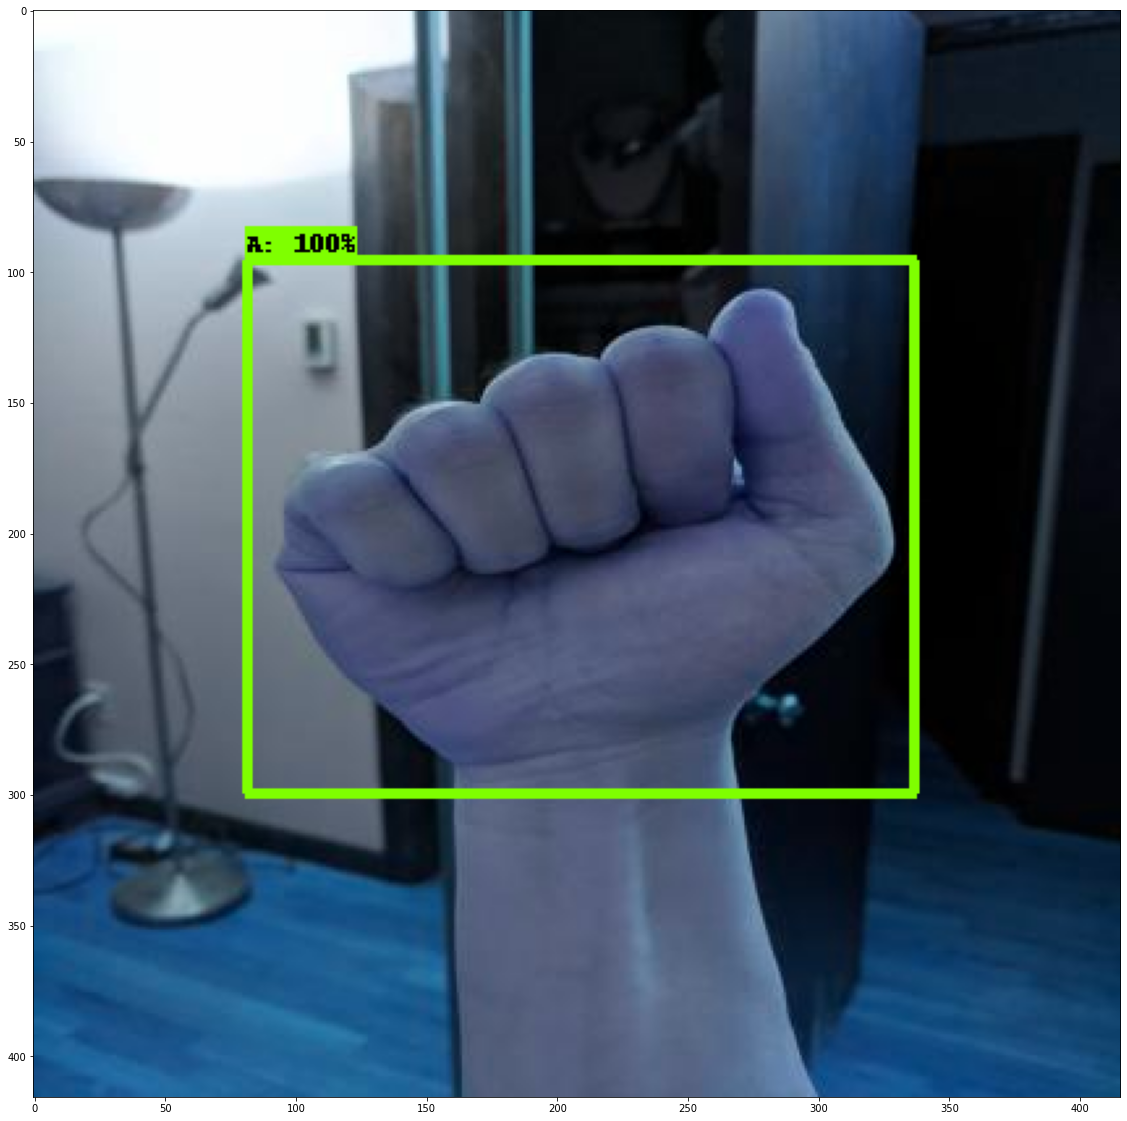

In [80]:
%matplotlib inline

plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.savefig